In [28]:
import os
import csv
import pandas as pd
from lxml import etree

In [26]:
os.mkdir('seouldata_XML')

In [27]:
!unzip -I EUC-KR 6110000_XML.zip -d seouldata_XML

Archive:  6110000_XML.zip
  inflating: seouldata_XML/6110000_서울특별시_01_01_01_P_병원.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_02_P_의원.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_03_P_부속의료기관.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_04_P_산후조리업.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_05_P_안전상비의약품판매업소.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_06_P_약국.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_07_P_응급환자이송업.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_08_P_의료법인.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_01_10_P_의료유사업.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_02_01_P_안경업.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_02_02_P_의료기기수리업.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_02_03_P_의료기기판매임대업.xml  
  inflating: seouldata_XML/6110000_서울특별시_01_02_04_P_치과기공소.xml  
  inflating: seouldata_XML/6110000_서울특별시_02_03_01_P_동물병원.xml  
  inflating: seouldata_XML/6110000_서울특별시_02_03_02_P_동물약국.xml  
  inflating: 

  inflating: seouldata_XML/6110000_서울특별시_09_30_04_P_건물위생관리업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_05_P_건설폐기물처리업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_06_P_급수공사대행업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_07_P_단독정화조오수처리시설설계시공업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_08_P_대기오염물질배출시설설치사업장.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_09_P_배출가스전문정비사업자확인검사대행자.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_10_P_분뇨수집운반업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_11_P_소독업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_12_P_수질오염원설치시설기타.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_13_P_쓰레기종량제봉투판매업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_14_P_저수조청소업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_15_P_환경관리대행기관.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_16_P_환경전문공사업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09_30_17_P_환경측정대행업.xml  
  inflating: seouldata_XML/6110000_서울특별시_09

In [189]:
pdir = 'seouldata_XML'

In [206]:
import os
import json
from tqdm import notebook

# seouldata_json 경로가 없는 경우 새롭게 만든다
if not os.path.isdir('seouldata_json'):
    os.mkdir('seouldata_json')

# xml파일을 하나씩 읽어 json으로 변환하여 저장한다
for fname in notebook.tqdm(os.listdir('seouldata_XML')):
    doc = etree.parse('seouldata_XML/' + fname)
    root = doc.getroot()
    header = root[0]
    mpage = {r.tag:int(r.text) for r in header[1]}
    if mpage['totalCount'] == 0:
        continue
    body = root[1]
    mdata = [{elem.tag: elem.text for elem in row} for row in body[0]]
    assert mpage['totalCount'] == len(mdata)
    with open('seouldata_json/' + fname[:-3] + 'json', 'w') as fp:
        json.dump(mdata, fp)

In [225]:
data_cols = []
for fname in notebook.tqdm(os.listdir('seouldata_json')):
    if fname[-4:] == 'json':
        with open('seouldata_json/' + fname) as fp:
            json_data = json.load(fp)
            data_cols.append(list(json_data[0].keys()))

In [254]:
kcols = data_cols[0]
for cols in data_cols[1:]:
    nkcols = []
    for c in cols:
        if c in kcols:
            nkcols.append(c)
    kcols = nkcols

In [256]:
all_data = []
for fname in notebook.tqdm(os.listdir('seouldata_json')):
    if fname[-4:] == 'json':
        with open('seouldata_json/' + fname) as fp:
            json_data = json.load(fp)
            all_data.extend([{k:item[k] for k in kcols} for item in json_data])

In [258]:
len(all_data)

In [261]:
adf = pd.DataFrame(all_data)

In [263]:
df = adf

0          199226.584598475
1           201686.07376784
2          201557.139555615
3          200942.649995561
4          199337.186542024
                 ...       
1915390     210199.45921923
1915391    208589.363343145
1915392    211798.748740544
1915393    207280.548175724
1915394    211218.957284378
Name: x, Length: 1771640, dtype: object

In [264]:
df = df[(df['x'] == df['x']) & (df['y'] == df['y'])].copy()

In [265]:
df['x']

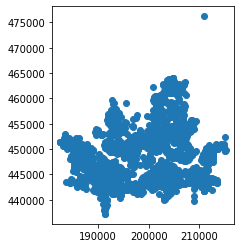

In [273]:
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)

In [289]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df.x, y=df.y)
)
gdf.crs = "+proj=tmerc +lat_0=38 +lon_0=127.0028902777778 +k=1 +x_0=200000 +y_0=500000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43"
ngdf = gdf.to_crs('EPSG:4326')

In [274]:
gdf.sample(frac=1).iloc[:2000].plot()